In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [3]:
#df = pd.read_csv("../input/gun-violence-data_01-2013_03-2018.csv")
df = pd.read_csv("gun-violence-data_01-2013_03-2018.csv")
df.drop(columns=['address','incident_url','latitude','longitude','location_description','incident_url_fields_missing','congressional_district','source_url','sources','state_house_district','state_senate_district'], inplace=True)
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
1,460726,2013-01-01,California,Hawthorne,1,3,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...
2,478855,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...
3,478925,2013-01-05,Colorado,Aurora,4,0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
4,478959,2013-01-07,North Carolina,Greensboro,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...


In [4]:
time = pd.DataFrame([each for each in df['date'].str.split('-').values.tolist()],
                             columns=['year', 'month', 'day'])
df['date'] = time['year']
df.tail()

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type
239672,1083142,2018,Louisiana,Rayne,0,0,0::Unknown,0::Unknown,Shots Fired - No Injuries,1.0,NaN,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect
239673,1083139,2018,Louisiana,Natchitoches,1,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)||Ins...",1.0,NaN,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect
239674,1083151,2018,Louisiana,Gretna,0,1,0::Unknown,0::Unknown,Shot - Wounded/Injured,1.0,NaN,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim
239675,1082514,2018,Texas,Houston,1,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)",1.0,"Vic was found shot to death in car on 4/1/18, ...",0::42,0::Adult 18+,0::Male,0::Leroy Ellis,NaN,0::Killed,0::Victim
239676,1081940,2018,Maine,Norridgewock,2,0,0::Unknown||1::Unknown,0::Handgun||1::Shotgun,"Shot - Dead (murder, accidental, suicide)||Sui...",2.0,"ALT: US 2, shot wife then self, handgun, shotg...",0::58||1::62,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Marie Lancaster Hale||1::William Hale,1::Significant others - current or former,0::Killed||1::Killed,0::Victim||1::Subject-Suspect


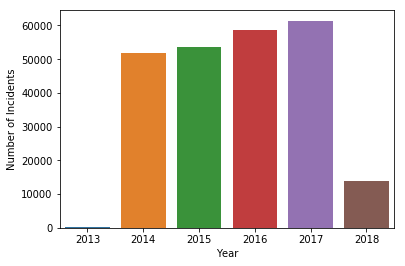

In [5]:
# Year-wise incidents
plt.figure();
ax = sns.countplot(data=df, x = 'date')
plt.ylabel('Number of Incidents');
plt.xlabel('Year');
df = df[(df['date'] != '2013') & (df['date'] != '2018')]

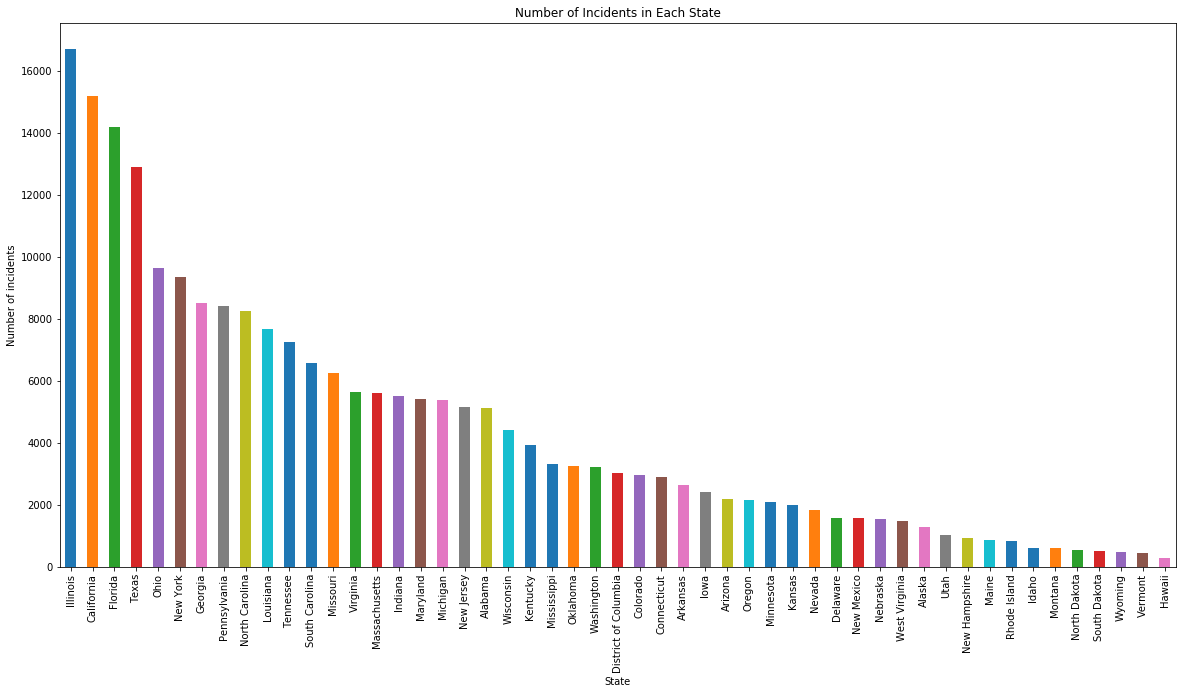

In [6]:
# Number of Incidents in Each State
plot = df.state.value_counts().plot(kind='bar', title="Number of Incidents in Each State", figsize=(20,10));
plot.set_xlabel('State');
plot.set_ylabel('Number of incidents');

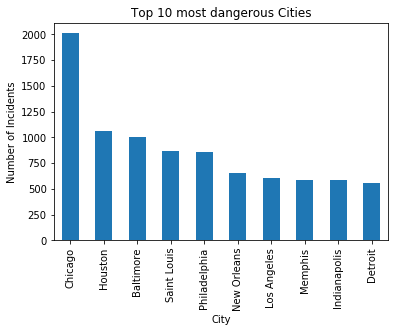

In [7]:
# Top 10 most dangerous cities
df_city_wise = df.groupby('city_or_county').agg({'n_killed':['sum']})
df_city_wise = df_city_wise.sort_values(by=[('n_killed','sum')], ascending=False)
df_city_wise = df_city_wise.head(10)
plt.figure();
ax = df_city_wise.plot(kind='bar', title="Top 10 most dangerous Cities");
ax.set_xlabel('City');
ax.set_ylabel('Number of Incidents');
ax.legend().set_visible(False);

In [17]:
# Number of Incidents by year and gender
import regex
years = df.date.unique()
males = []; females = []
def count_gender(df_gender):
    male = 0; female = 0
    for i in df_gender:
        i = regex.sub("\d::", "", str(i))
        i = i.split("||")
        for j in i:
            if j == "Male":
                male = male+1
            else:
                female = female+1
    males.append(male)
    females.append(female)
for year in years:
    df_year = df[df['date'] == year]
    df_gender = df_year['participant_gender']
    count_gender(df_gender)


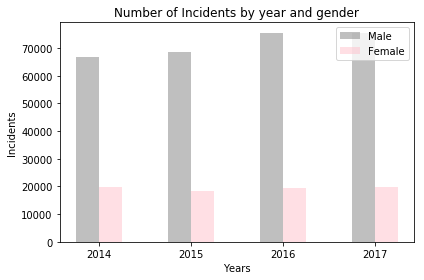

In [10]:
n_groups = 4
fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.5
rects1 = ax.bar(index, males, bar_width,
                alpha=opacity, color='gray',
                label='Male')

rects2 = ax.bar(index + bar_width, females, bar_width,
                alpha=opacity, color='pink',
                label='Female')

ax.set_xlabel('Years')
ax.set_ylabel('Incidents')
ax.set_title('Number of Incidents by year and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(years)
ax.legend()

fig.tight_layout()
plt.show()

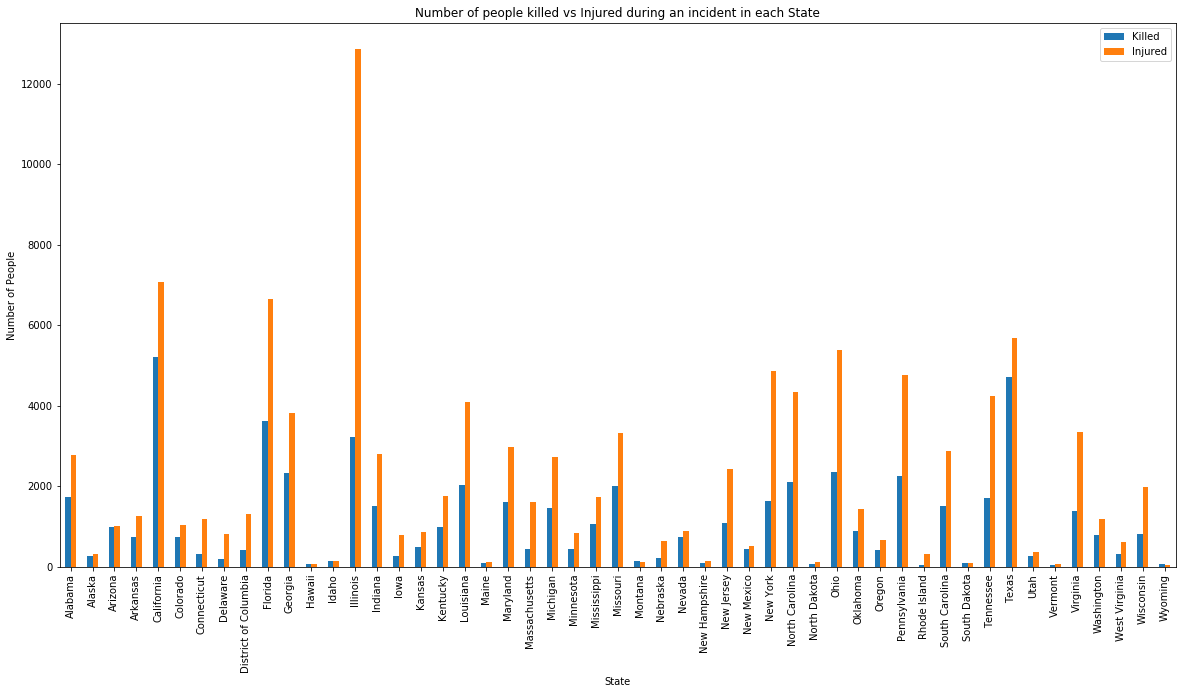

In [11]:
state_wise = df.groupby('state').agg({'n_killed':['sum'], 'n_injured':['sum']})
ax = state_wise.plot(kind='bar', title="Number of people killed vs Injured during an incident in each State", figsize=(20,10));
ax.set_xlabel('State');
ax.set_ylabel('Number of People');
ax.legend(["Killed","Injured"]);



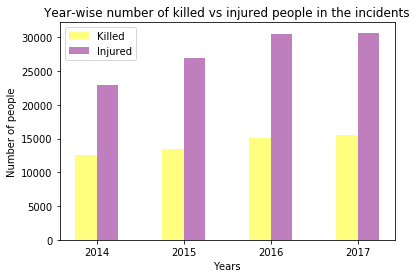

In [12]:
# Year-wise number of killed vs injured people in the incidents
year_wise_killed = df.groupby('date').agg({'n_killed':['sum']})
year_wise_injured = df.groupby('date').agg({'n_injured':['sum']})
n_groups = 4
fig, ax = plt.subplots();

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.5
rects1 = ax.bar(index, year_wise_killed[('n_killed','sum')], bar_width,
                alpha=opacity, color='yellow',
                label='Killed')

rects2 = ax.bar(index + bar_width, year_wise_injured[('n_injured','sum')], bar_width,
                alpha=opacity, color='purple',
                label='Injured')

ax.set_xlabel('Years')
ax.set_ylabel('Number of people')
ax.set_title('Year-wise number of killed vs injured people in the incidents')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(years)
ax.legend();


In [13]:
# Year-wise number of Adults vs Teens involved in the incidents
import regex
adults = []; teens = []
def count_age(df_age):
    adult = 0; teen = 0
    for i in df_age:
        i = regex.sub("\d::", "", str(i))
        i = i.split("||")
        for j in i:
            if j == "Adult 18+":
                adult = adult+1
            else:
                teen = teen+1
    adults.append(adult)
    teens.append(teen)
for year in years:
    df_year = df[df['date'] == year]
    df_year = df_year.dropna()
    df_age = df_year['participant_age_group']
    count_age(df_age)
print(adults)
print(teens)

[663, 2178, 4444, 4654]
[132, 306, 502, 442]


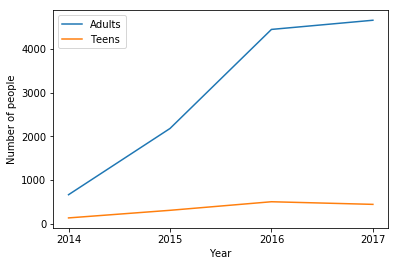

In [14]:
# Year-wise number of killed vs injured people in the incidents
plt.plot(years, adults, years, teens)
plt.xlabel("Year")
plt.ylabel("Number of people")
plt.legend(["Adults","Teens"])
plt.show()


In [15]:
# State-wise number of Adults vs Teens involved in the incidents
import regex
states = df.state.unique()
adults = {}; teens = {}
def count_age(state, df_age):
    adult = 0; teen = 0
    for i in df_age:
        i = regex.sub("\d::", "", str(i))
        i = i.split("||")
        for j in i:
            if j == "Adult 18+":
                adult = adult+1
            else:
                teen = teen+1
    adults[state] = adult
    teens[state] = teen
for state in states:
    df_year = df[df['state'] == state]
    df_year = df_year.dropna()
    df_age = df_year['participant_age_group']
    count_age(state,df_age)

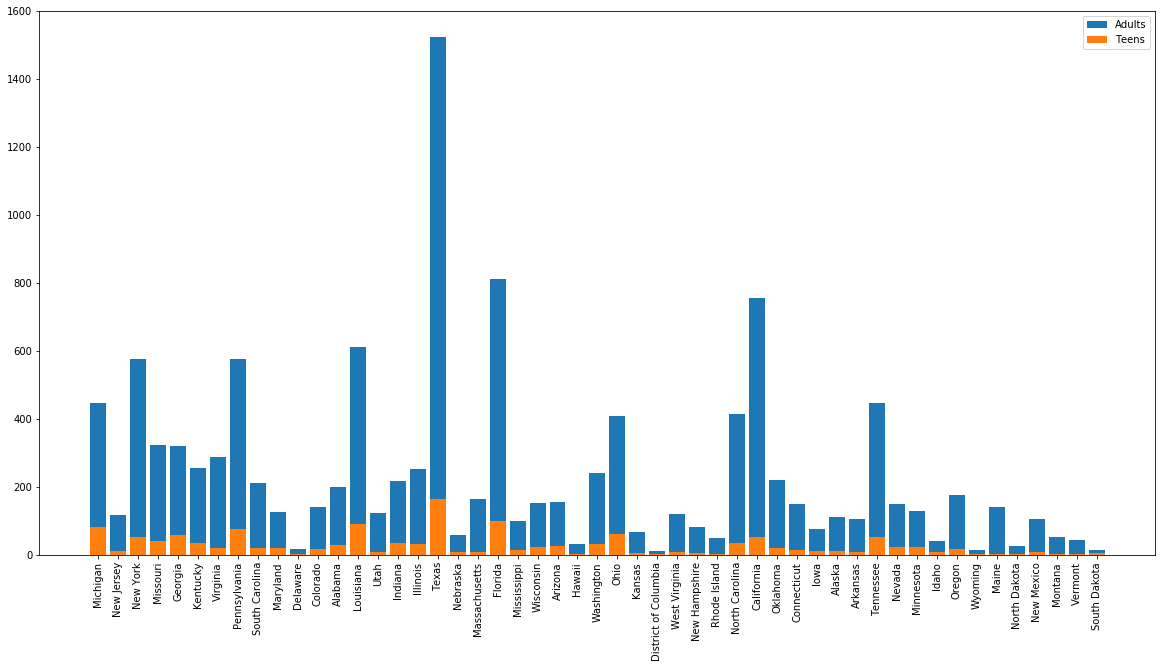

In [16]:
plt.figure(figsize=(20,10))
plt.bar(range(len(adults)), adults.values(), align='center')
plt.xticks(range(len(adults)), adults.keys());
locs, labels = plt.xticks();
plt.setp(labels, rotation=90);
plt.bar(range(len(teens)), teens.values(), align='center')
plt.legend(["Adults","Teens"]);
